# Video: Data Approximations using Principal Components

This video shows how to approximate data using principal components and projections.

Script:
* I will now show you an example of using principal components to approximate data.
* Specifically, I will show you how to approximate data using the principal components of the dataset.
* This follows up on the previous video about approximating data with any orthonormal basis.
* And this approximation is a projection if the data is zero-centered first, and we will do that zero centering before projecting.

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

pd.options.mode.copy_on_write = True

In [ ]:
penguins_adelie = pd.read_csv("https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.219.3&entityid=002f3893385f710df69eeebe893144ff", index_col="Sample Number")
penguins_gentoo = pd.read_csv("https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.220.3&entityid=e03b43c924f226486f2f0ab6709d2381", index_col="Sample Number")
penguins_chinstrap = pd.read_csv("https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.221.2&entityid=fe853aa8f7a59aa84cdd3197619ef462", index_col="Sample Number")
penguins = pd.concat([penguins_adelie, penguins_gentoo, penguins_chinstrap])

# this will make joins easier later
penguins = penguins.reset_index(drop=True)

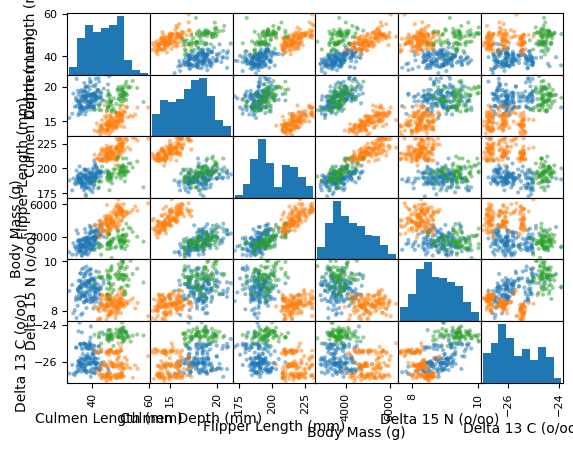

In [ ]:
penguins_colored = penguins.drop("Comments", axis=1).dropna()
penguins_colored["color"] = penguins_colored["Species"].map(dict(zip(penguins["Species"].unique(), plt.rcParams['axes.prop_cycle'].by_key()["color"])))
_ = pd.plotting.scatter_matrix(penguins_colored, color=penguins_colored["color"])

Script:
* As a baseline for comparison, I have borrowed this scatter matrix chart from module 2.
* It shows all scatter plots for all pairs of numerical dimensions, and is colored by penguin species.
* The question for this video will be, can we reconstruct something similar just using a few principal components?
* This data has six numerical columns, so there are six principal components.
* I will reproduce this chart using just the first three principal components, and then we can compare back to this chart.
* Let's get started with the principal components analysis.

In [ ]:
penguins_pca_columns = [c for c in penguins.columns if penguins[c].dtype == 'float64']

In [ ]:
penguins_pca = PCA()
penguins_pca.fit(penguins[penguins_pca_columns].dropna())
penguins_components = pd.DataFrame(penguins_pca.components_, columns=penguins_pca_columns)
penguins_components

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0.004014,-0.001149,0.015170,0.999876,-0.000369,-0.000368
1,-0.308003,0.093243,-0.946673,0.015707,0.001370,0.001227
2,0.936946,0.146198,-0.290194,0.000872,0.054578,0.116471
3,-0.123505,0.974537,0.136403,-0.000390,0.115170,0.056156
4,-0.108833,-0.099775,0.027162,0.000347,0.226099,0.962467
5,0.012303,0.101256,0.004877,-0.000275,-0.965730,0.238616


Script:
* The first principal component is mostly based on the body mass, the second is mostly based on flipper length, and the third is mostly the culmen length.
* We can guess that reconstructions of those columns should be pretty accurate.
* Next, I'll compute the mean of each column so each one will be zero centered when we project.

In [ ]:
penguins_mean = penguins[penguins_pca_columns].mean()
penguins_mean

,0
Culmen Length (mm),43.921930
Culmen Depth (mm),17.151170
Flipper Length (mm),200.915205
Body Mass (g),4201.754386
Delta 15 N (o/oo),8.733382
Delta 13 C (o/oo),-25.686292


Script:
* Those are the average penguin stats of this dataset.
* Next, I'll center and project the penguin data.

In [ ]:
penguins_projected = (penguins[penguins_pca_columns].dropna() - penguins_mean) @ penguins_components.iloc[:3].T
penguins_projected

,0,1,2
1,-401.949340,9.196084,-0.001460
2,-951.741687,-8.154949,-2.361641
4,-751.812906,-1.889588,-4.767038
5,-551.874228,3.412165,-1.098422
6,-577.006265,11.402478,0.745219
...,...,...,...
339,-201.593224,-12.338053,9.761770
340,-801.642068,-13.399355,-1.086547
341,-426.800614,-0.858854,7.552102
342,-101.579305,-12.141745,4.173993


Script:
* That's the first three PCA coordinates for each penguin.
* Next, let's reconstruct the data and add back the average penguin.

In [ ]:
penguins_reconstructed = penguins_projected @ penguins_components.iloc[:3] + penguins_mean
penguins_reconstructed

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
1,39.474592,18.470443,186.112529,3799.999299,8.894051,-25.527406
2,40.400361,17.139485,194.883059,3250.000488,8.944100,-25.621453
4,37.019459,17.142215,192.682684,3450.000808,8.747716,-25.967430
5,39.626417,17.943091,189.632039,3650.001184,8.881514,-25.607146
6,38.791881,18.986555,181.151568,3624.999373,9.002348,-25.373374
...,...,...,...,...,...,...
339,56.059083,17.659604,206.704408,4000.000860,9.323553,-24.490347
340,43.812894,16.664367,201.754725,3400.000244,8.951183,-25.534558
341,49.549064,18.665772,193.062284,3774.999756,9.301689,-24.650832
342,51.164660,16.746027,209.657280,4100.000596,8.981991,-25.177690


Script:
* We have reconstituted penguins.
* Let's recolor them and remake the scatter matrix now.

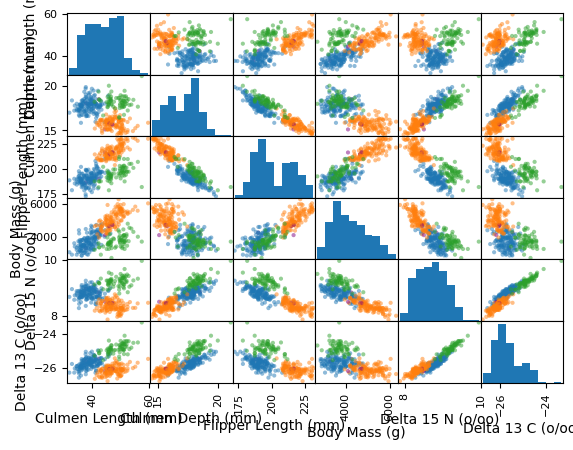

In [ ]:
penguins_reconstructed["color"] = penguins_colored["color"]
penguins_reconstructed["color"] = penguins_reconstructed["color"].fillna("purple")
pd.plotting.scatter_matrix(penguins_reconstructed, c=penguins_reconstructed["color"])
None

Script:
* That looks similar, but neater than before.
* Let's compare to the original.

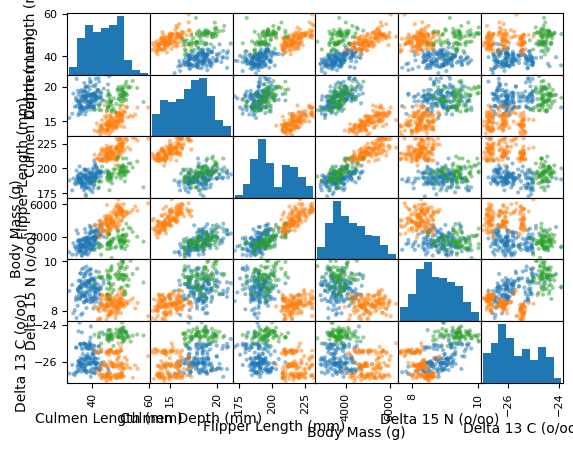

In [ ]:
_ = pd.plotting.scatter_matrix(penguins_colored, color=penguins_colored["color"])
None

Script:
* Scrolling back and forth, some of them look pretty similar.
* In broad strokes, the top left scatter plots look more similar.
* While those on the bottom and left edges look pretty far off.
* The two scatter plots closest to the bottom right look particularly far off.
* In the reconstruction, the points are laid out in a rough line, but they are much more spread out in the original.
* That said, the ability to approximates these charts suggest that the principal components captured some of the important details in the data.